In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


datasets = pd.read_csv('./social_Network_Ads.csv')


In [2]:
datasets.head(3)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [3]:
x = datasets.iloc[: , [2,3]].values
y = datasets.iloc[:, 4].values

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)


In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train=sc_X.fit_transform(x_train)
x_test=sc_X.transform(x_test)

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression (random_state=0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [7]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_curve
cm= confusion_matrix(y_test, y_pred)


In [8]:
cm

array([[74,  5],
       [11, 30]])

In [9]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy_score_ = accuracy_score(y_test, y_pred)
recall_score_ = recall_score(y_test, y_pred)
precision_score_ = precision_score(y_test, y_pred)
f1_score_ = f1_score(y_test, y_pred)

print('Accuracy Score:', accuracy_score_)
print('Recall Score:', recall_score_)
print('Precision Score:', precision_score_)
print('F1 Score:', f1_score_)


Accuracy Score: 0.8666666666666667
Recall Score: 0.7317073170731707
Precision Score: 0.8571428571428571
F1 Score: 0.7894736842105263


In [10]:
print(type(accuracy_score)) 

<class 'function'>


In [11]:
from sklearn.tree import DecisionTreeRegressor
df = pd.read_csv("./Position_Salaries.csv")
df.head(2)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000


In [12]:
x = df.iloc[: , 1:2].values
y = df.iloc[: , 2].values

In [13]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [14]:
values_to_predict = 6.5
y_pred = reg.predict([[values_to_predict]])
print(f"level {values_to_predict}:{y_pred[0]}")

level 6.5:150000.0


C:\Users\20122\AppData\Local\Temp\ipykernel_18288\619708355.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(x), max(x), 0.01)  # Generate a fine grid of values


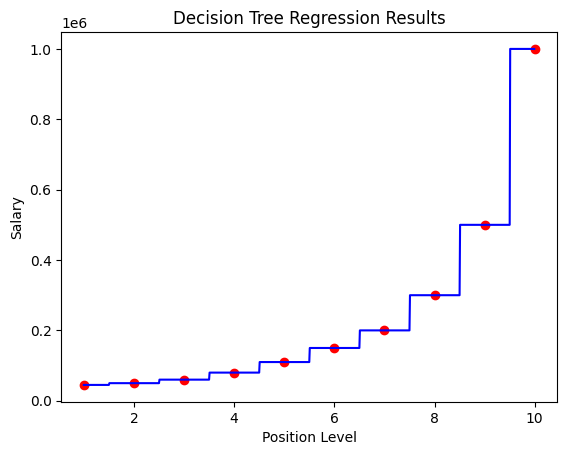

In [15]:
# Visualizing the Decision Tree Regression results (higher resolution and smoother curve)
X_grid = np.arange(min(x), max(x), 0.01)  # Generate a fine grid of values
X_grid = X_grid.reshape((len(X_grid), 1))  # Reshape to 2D array
plt.scatter(x,y, color='red', label='Actual Data')
plt.plot(X_grid, reg.predict(X_grid), color='blue', label='Regression Curve')
plt.title('Decision Tree Regression Results')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()